# ripe or rotten mango?

In this section, we reload the necessary modules to ensure that any changes in the code are reflected immediately. Additionally, we append a directory to the system path to facilitate module imports from that location. 

In [3]:
import sys 
sys.path.append('../')

%reload_ext autoreload
%autoreload 2

This section includes the necessary libraries for data manipulation, image processing, and visualization, along with custom classes to manage the dataset, load it, and process the images.

In [4]:
import os
import cv2  
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  

from PIL import Image
from random import sample  
from src import CSVData, MangoDataset, MangoProcessor   

%matplotlib inline

In this section, we initialize the `MangoDataset`, which contains our training and validation datasets. We then create a DataFrame called `image_df` from the training data, organizing it into two columns: "label" and "filename". This structured format allows for easier manipulation and analysis of our dataset.

In [18]:
dataset = MangoDataset()

train_set = dataset.train_data
validation_set = dataset.validation_data

image_df = pd.DataFrame(train_set, columns=["label", "filename"])
print(image_df.shape)
image_df.sample(5)

(1989, 2)


,label,filename
738,Rotten,587.jpg
1162,Rotten,anthracnose_118.jpg
1970,Rotten,rottenMango (79).jpg
68,Ripe,244.jpg
633,Rotten,385.jpg


We create an instance of `MangoProcessor` using the training dataset. This step sets up the processor to handle image preprocessing tasks efficiently.

In [6]:
processor = MangoProcessor(train_set)

After initializing the processor, we call the `get_processed_data()` method to obtain the processed images. These images are then organized into a DataFrame called `features_df`, which contains the relevant features for subsequent analysis and modeling.

In [22]:
processed_set = processor.get_processed_data()

features_df = pd.DataFrame(processed_set)
print(features_df.shape)
features_df.sample(5)

(1989, 4865)


,label,0,1,2,3,4,5,6,7,8,...,4854,4855,4856,4857,4858,4859,4860,4861,4862,4863
178,1,0,15,18,16,6,10,25,28,10,...,0,0,0,0,0,0,0,0,0,0
489,1,0,0,3,4,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1092,0,0,10,12,9,2,9,23,37,59,...,12,11,10,9,5,9,5,2,1,0
1469,0,0,3,3,0,2,1,5,3,1,...,0,0,0,0,0,0,0,0,0,0
587,0,0,3,4,5,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The `show_samples` function is designed to display a selection of original and processed images from the dataset. It randomly samples a specified number of images and presents them in a grid format. The first row shows the original images, while the second row displays the processed images along with their corresponding labels, allowing for a clear comparison of the preprocessing effects.

TypeError: Image data of dtype object cannot be converted to float

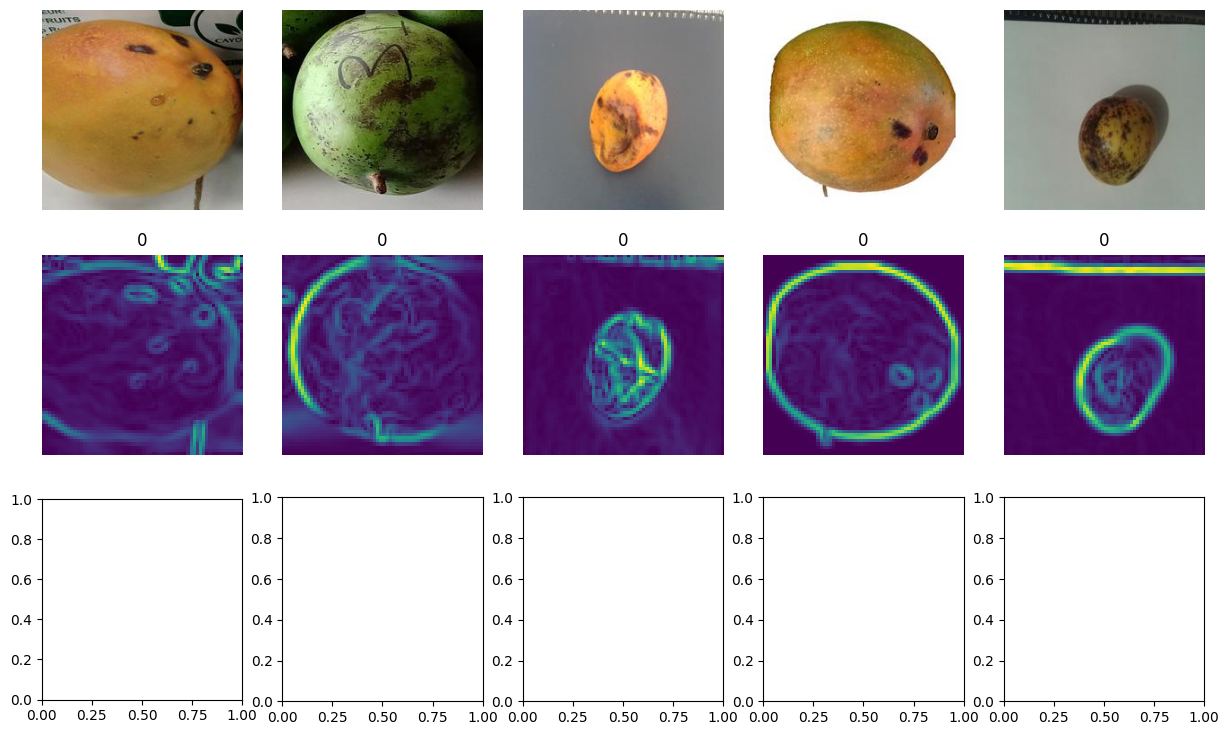

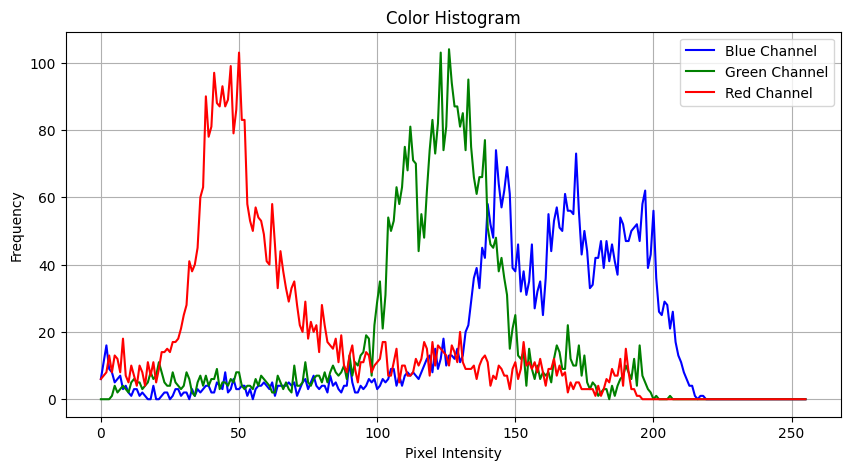

In [ ]:
def show_samples(processed_set, train_set, num_samples=5):
    num_samples = min(num_samples, len(processed_set))

    indices = sample(range(len(processed_set)), num_samples)
    selected_images = [(train_set[i], processed_set[i]) for i in indices]

    fig, axes = plt.subplots(2, num_samples, figsize=(15, 6))

    for ax, (orig_img, proc_img) in zip(axes[0], selected_images):
        ax.imshow(processor.load_original("train", orig_img))
        ax.axis("off")

    for ax, (orig_img, proc_img) in zip(axes[1], selected_images):
        ax.set_title(proc_img["label"])
        ax.imshow(processor.load_processed(proc_img))
        ax.axis("off")

    plt.tight_layout()
    plt.show()


show_samples(processed_set, train_set)